In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pickle 

with open("../data/processed/preprocessed_data.pkl","rb") as f:
    data = pickle.load(f)

X_train_resampled = data["X_train_resampled"]
y_train_resampled = data["y_train_resampled"]
X_test_processed = data["X_test_processed"]
y_test = data["y_test"]

In [2]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"===== {model_name} =====")
    print(classification_report(y_true, y_pred))

    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

Accuracy: 0.7374024130589071
Precision: 0.5033898305084745
Recall: 0.7941176470588235
F1 Score: 0.6161825726141079
ROC-AUC: 0.8400191170012142


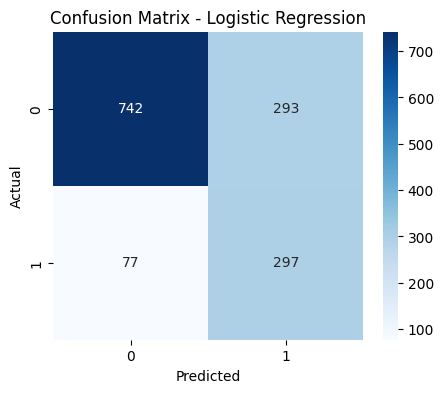

In [4]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_resampled, y_train_resampled)

y_pred_lr = log_reg.predict(X_test_processed)
y_prob_lr = log_reg.predict_proba(X_test_processed)[:, 1]

evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")